In [1]:
# Import the libraries
import yfinance as yf

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Create an object to access AMZN stock
stock = yf.Ticker('AMZN')

In [4]:
# Load AMZN's historical data
hist_data = stock.history(period='1y')
hist_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-25 00:00:00-04:00,104.910004,105.449997,102.449997,102.570000,65026800,0.0,0.0
2023-04-26 00:00:00-04:00,105.040001,106.620003,104.099998,104.980003,73803800,0.0,0.0
2023-04-27 00:00:00-04:00,108.160004,110.860001,106.800003,109.820000,149961200,0.0,0.0
2023-04-28 00:00:00-04:00,107.730003,109.480003,104.330002,105.449997,130565000,0.0,0.0
2023-05-01 00:00:00-04:00,104.949997,105.230003,101.820000,102.050003,74728100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-18 00:00:00-04:00,181.470001,182.389999,178.649994,179.220001,30723800,0.0,0.0
2024-04-19 00:00:00-04:00,178.740005,179.000000,173.440002,174.630005,55950000,0.0,0.0
2024-04-22 00:00:00-04:00,176.940002,178.869995,174.559998,177.229996,37924900,0.0,0.0


In [5]:
# Extract closing prices as a Series
prices = hist_data['Close']
prices

Date
2023-04-25 00:00:00-04:00    102.570000
2023-04-26 00:00:00-04:00    104.980003
2023-04-27 00:00:00-04:00    109.820000
2023-04-28 00:00:00-04:00    105.449997
2023-05-01 00:00:00-04:00    102.050003
                                ...    
2024-04-18 00:00:00-04:00    179.220001
2024-04-19 00:00:00-04:00    174.630005
2024-04-22 00:00:00-04:00    177.229996
2024-04-23 00:00:00-04:00    179.539993
2024-04-24 00:00:00-04:00    176.589996
Name: Close, Length: 252, dtype: float64

In [6]:
# Compute the log-returns (daily)
log_rets = np.log(prices / prices.shift(1))
log_rets

Date
2023-04-25 00:00:00-04:00         NaN
2023-04-26 00:00:00-04:00    0.023224
2023-04-27 00:00:00-04:00    0.045073
2023-04-28 00:00:00-04:00   -0.040606
2023-05-01 00:00:00-04:00   -0.032774
                               ...   
2024-04-18 00:00:00-04:00   -0.011429
2024-04-19 00:00:00-04:00   -0.025945
2024-04-22 00:00:00-04:00    0.014779
2024-04-23 00:00:00-04:00    0.012950
2024-04-24 00:00:00-04:00   -0.016567
Name: Close, Length: 252, dtype: float64

In [7]:
# Delete the first NaN row
log_rets = log_rets.dropna()
log_rets

Date
2023-04-26 00:00:00-04:00    0.023224
2023-04-27 00:00:00-04:00    0.045073
2023-04-28 00:00:00-04:00   -0.040606
2023-05-01 00:00:00-04:00   -0.032774
2023-05-02 00:00:00-04:00    0.015364
                               ...   
2024-04-18 00:00:00-04:00   -0.011429
2024-04-19 00:00:00-04:00   -0.025945
2024-04-22 00:00:00-04:00    0.014779
2024-04-23 00:00:00-04:00    0.012950
2024-04-24 00:00:00-04:00   -0.016567
Name: Close, Length: 251, dtype: float64

<Axes: xlabel='Date'>

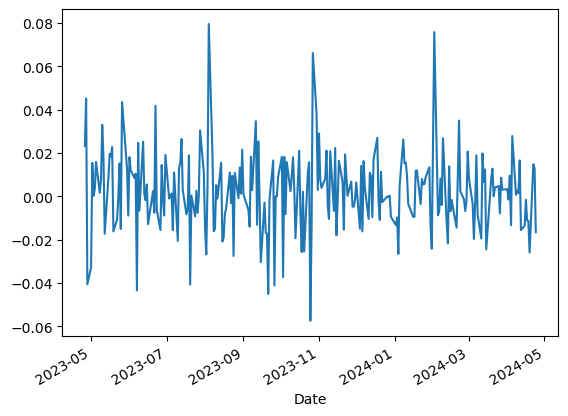

In [8]:
# Plot of log-returns
log_rets.plot()

In [9]:
# Compute the historical volatility
import statistics as stat

vol_day = stat.stdev(log_rets)
vol_year = vol_day * np.sqrt(252)

print('Historical volatility of AMZN =', vol_year)

Historical volatility of AMZN = 0.2901218194069458
